# Rechnerarithmetik
Dieses Kapitel beschäftigt sich damit, wie Zahlen dargestellt werden, was für Fehler dabei entstehen können und wie sich diese bei Operationen fortpflanzen.

Lernziele:
- Sie verstehen die Definition der maschinendarstellbaren Zahlen.
- Sie können die Fehler, die beim Abbilden von reellen Zahlen auf Maschinenzahlen entstehen, sowie die Maschinengenauigkeit berechnen.
- Sie können die Fortpflanzung von Fehlern bei Funktionsauswertungen abschätzen und die Konditionszahl berechnen.

## Maschinenzahlen

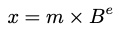

m = Mantisse, e = Exponent und B = Basis

(Computerintern wird üblicherweise die Basis B = 2 - für Binär - verwendet "1" und "0").

#### Aufgabe 2.1:
- Überlegen Sie sich: wie viele verschiedene Möglichkeiten gibt es, mit Binärzahlen ein Byte zu füllen?

$2^{8} = 256 Möglichkeiten$ (Wegen 1 Byte hat 8 Bits)

- Wie viele Ziffern bräuchten Sie im Hexadezimalsystem, um die gleiche Anzahl Möglichkeiten zu erhalten?

2 Ziffern, da $16^{2} = 256$

- Was folgern Sie daraus bzgl. der Vorteile des Hexadezimalsystems?

Ein Byte im Binärsystem kann durch 2 Ziffern im Hexadezimalsystem ersetzt werden. Lange binäre Zeichenketten lassen sich also im Hexade- zimalsystem sehr kompakt darstellen, wobei jeweils Gruppen mit 4 Bits durch eine Hexadezimal-Ziffer ersetzt werden kann.

Der exponent definiert die Position des Dezimalpunktes:

$x = 112.78350 = 112.78350 * 10^{0} = 1127835.0 * 10^{-4} = 0.11278350 * 10^{3}$

Wenn der Exponent:
- Positiv ist, dann geht die Kommastelle nach RECHTS.
- Negativ ist, dann get die Kommastelle nach LINKS.

Normiert und nicht normiert:
- Eine normierte Zahl hat als erste Ziffer vor dem Punkt eine 0 und die erste Ziffer nach dem Punkt ist ungleich 0.

#### Aufgabe 2.2:
- Wie viele Stellen benötigt man für die Mantisse, um die folgenden Zahlen als n-stellige Gleitpunktzahlen im Dezimalsystem darzustellen? Wie gross ist der zugehörige Exponent?

$x_{1} = 0.00010001, x_{2} = 1230001, x_{3} = \frac{4}{5}, x_{4} = \frac{1}{3}$

$x_{1} = 5$ Stellen, $x_{2} = 7$ Stellen, $x_{3} = 1$ Stelle, $x_{4} = 0.3333...$ ist fuer kein n als n-stellige Gleitpunktzahl darstellbar

- Bestimmen Sie alle dualen positiven 3-stelligen Gleitpunktzahlen mit einstelligem positiven binären Exponenten sowie ihren dezimalen Wert.

$0.000 * 2^{0} = 0, 0.100 * 2^{0} = 0.5, 0.101 * 2^{0} = 0.625, 0.110 * 2^{0} = 0.75, 0.111 * 2^{0} = 0.875, 0.100 * 2^{1} = 1, 0.101 * 2^{1} = 1.25 ...$

- Wie viele verschiedene Maschinenzahlen gibt es auf einem Rechner, der 20-stellige Gleitpunktzahlen mit 4- stelligen binären Exponenten sowie dazugehörige Vorzeichen im Dualsystem verwendet? Wie lautet die kleinste positive und die grösste Maschinenzahl?

<img src="attachment:a2cca199-4d38-45d1-8b94-0377e15ef1d9.png" style="width:430px;height:200px;"/>

## Approximations- und Rundungsfehler

Formel um die groesste und kleinste Zahl herauszufinden:

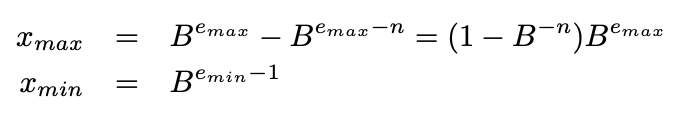

#### Aufgabe 2.3:
- Schreiben Sie die kleinste und grösste binäre positive Maschinenzahl für die Abbildung explizit auf und berechnen Sie deren Wert.

<img src="attachment:1ec55b8a-87a6-4926-a37e-e126d0b01f5f.png" style="width:730px;height:200px;"/>

Lösung: $x_{max}=0.1111 * 2^{3} = 7.5 und x_{min} = 0.1000 * 2^{0} = 0.5$

- Stimmt das mit $x_{max}$ und $x_{min}$ überein?

Lösung: $x_{max} = 2^{3} - 2^{-1} = 7.5$ und $x_{xmin} = 2^{-1} = 0.5$. Antwort: ja.

### Rundungsfehler und Maschinengenauigkeit

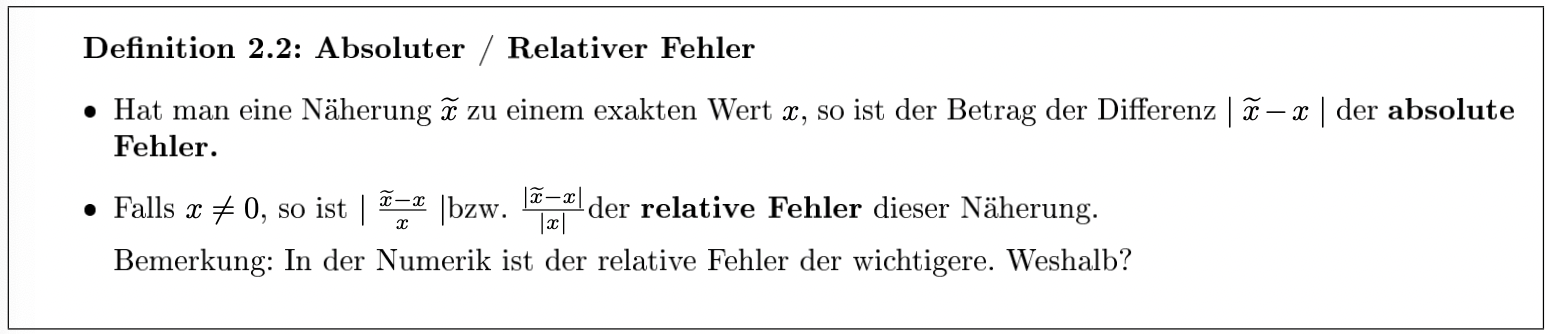

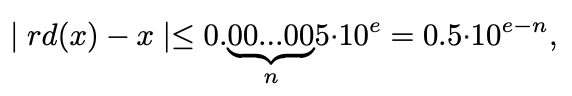

#### Beispiel:

Sei $x = 180.1234567 = 0.1801234567 · 10^{3}$. Gerundet auf eine siebenstellige Mantisse ($n = 7$) erhält man $rd(x) = 0.1801235 · 10^{3}$ und es gilt wegen $e = 3$

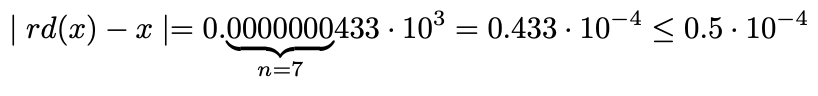

#### Aufgabe 2.4:

- Vergewissern Sie sich anhand einfacher Zahlenbeispiele, dass die Rundung ein besseres Verfahren für die Abbildung einer reellen Zahl auf eine Maschinenzahl darstellt als einfaches Abschneiden der überzähligen Ziffern. Was ist der maximale Fehler, der durch das Abschneiden auftreten kann?

Lösung: 0.739 im Dezimalsystem. Durch Abschneiden eine zwei- setllige Mantisse -> 0.73 mit einem absolutem Fehler von 0.009. Wenn man jedoch rundet erhält man 0.74 mit einem absoluten Fehler von 0.001. Der maximale Fehler bei einer Rundung beträgt 0.005 (z.B. wird 0.7350 auf 0.74 aufgerundet), während der maximale Fehler beim Abschneiden (fast) doppelt so gross sein kann (z.B. wird 0.7399 auf 0.73 abgeschnitten) mit dem absoluten Fehler von (fast) 0.01.

### Maschinengenauigkeit:
Sie gibt den maximalen relativen Fehler, der durch Rundung entstehen kann.

$eps := \frac{B}{2} * B^{-n}$

#### Aufgabe 2.5:
- a)Berechnen Sie $s := \sum_{i=1}^{300}\frac{1}{i^{2}}$ sowohl auf- als auch absteigend, je einmal mit 3-stelliger und 5-stelliger Gleitpunktarithmetik.

Loesung: 

In [24]:
import numpy as np

def calculateFunctionWithBaseAndRound(f, rangeX, base, decimalPlace):
    exact_result = 0
    for i in range(1,rangeX+1):
        # bevor addiert wird, wird die funktion f(x) aufgerufen und das ergebnis mit der Basis und dem decimalPlace gerundet
        exact_result += base*round(f(i)/base,decimalPlace)
    return exact_result

def foo(i): 
    return 1/i**2

print(calculateFunctionWithBaseAndRound(foo, 300, 10, 3))
print(calculateFunctionWithBaseAndRound(foo, 300, 10, 5))

1.59
1.6389999999999976


- b)Es ist $\lim\limits_{n \rightarrow \infty}(1+\frac{1}{n})^{n} = e$ Erstellen Sie eine Tabelle mit ihrem Rechner oder Python für n = 1, 10, 100, ... für den Ausdruck $(1+\frac{1}{n})^{n}$ sowie den absoluten und relativen Fehler. Erklären Sie Ihre Beobachtungen.

Loesung:

In [8]:
import numpy as np
import math as m

def berechneAbsolutenUndRelativenFehler(f, expectedResult):
    resultDifference = f-expectedResult
    absoluterFehler = np.absolute(resultDifference)
    relativerFehler = np.absolute(resultDifference/expectedResult)
    return (absoluterFehler, relativerFehler)

def f(n):
    return (1+1/n)**n

print(berechneAbsolutenUndRelativenFehler(f(10**0), m.e))
print(berechneAbsolutenUndRelativenFehler(f(10**2), m.e))

(0.7182818284590451, 0.26424111765711533)
(0.01346799903751661, 0.004954599959619134)


### Fehlerfortpflanzung bei Funktionsauswertungen / Konditionierung
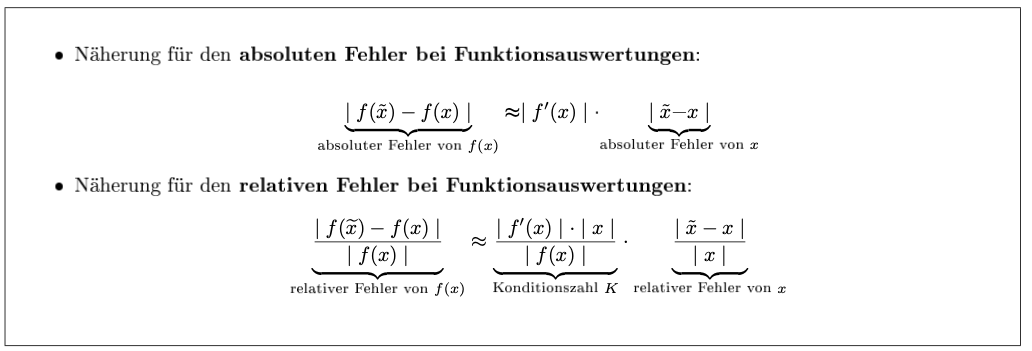

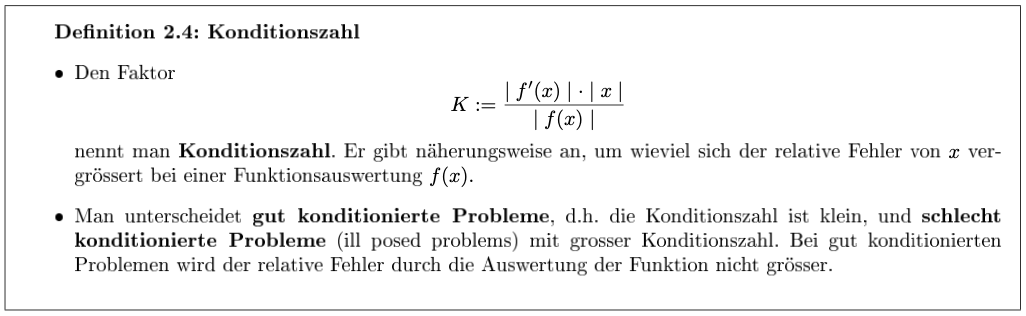

#### Bemerkungen:
- Eine gute Konditionierung liegt bei $K\leq{1}$
- Bei der Funktionsauswertung steigert sich der absolute Fehler von $x$ mit dem Faktor von $f′(x)$. Falls $| f′(x) | > 1$ wird der absolute Fehler grösser, falls $| f′(x) | < 1$ kleiner.

#### Beispiel 1.0:
- $f(x) = sin(x)$. Da $|f'(x)| = |cos(x)| < 1$, folgt dass der absolute Fehler in den Funktionswerten kleiner als in den x-Werten sein kann.
- Jedoch bei $f(x) = 1000 * x$ wird wegen $f'(x) = 1000$ der absolute Fehler um den Faktor 1000 grösser.

#### Beispiel 1.1:
- $r=\frac{3}{5}$ und $r=\frac{4}{7}$ wandeln wir zu einer 5 stelligen Maschinen Mantisse also:

In [15]:
print(float_bin(3/5, places = 5))
print(float_bin(4/7, places = 5))

.10011
.10010


Nun berechnen wir die Differenzen zwischen den beiden Zahlen:
- $r-s=\frac{3}{5}-{4}{7}=\frac{1}{35}$
- $0.10011 - 0.10010 = 0.00001 = 0.10000 * 2^{-4} = \frac{1}{32}$

Für den relativen Fehler erhalten wir:
- $\frac{\frac{1}{32} - \frac{1}{35}}{\frac{1}{35}} = 0.0938 = 9.4$%

### Praktikas der für die Rechnerarithemtik

## Übungsserie 2
### Aufgabe 1
- Bestimmen Sie die Anzahl verschiedener Maschinenzahlen auf einem Rechner, der 15-stellige Gleitpunktzahlen mit 5-stelligen Exponenten sowie dazugehörige Vorzeichen im Dualsystem verwendet.
- Geben Sie die Maschinengenauigkeit einer Rechenmaschine an, die mit 16-stelliger Dezimalarithmetik arbeitet.
- Gegeben seien zwei verschiedene Rechenmaschinen. Die erste davon arbeite mit einer 52-stelligen Binärarithmetik (entspricht double Precision im IEEE Format) und die zweite mit einer 14-stelligen Hexadezimalarithmetik. Welche Maschine rechnet genauer? (Mit Begründung!)

Lösung:
- Für die 15-stellige Mantisse im Dualsystem gibt es $2^{14}$ verschiedene Möglichkeiten (die erste Nachkommaziffer muss ja 1 sein, weil z.B. 0.01 gilt nicht). Zusammen mit dem Vorzeichen gibt es also $2^{15}$ Möglichkeiten. Für den 5-stelligen Exponenten im Dualsystem gibt es $2^{5}$ Möglichkeiten, inkl. Vorzeichen also $2^{6}$ − 1 (da die Null doppelt gezälhlt wurde). Insgesamt gibt es also $2^{15} · (2^{6} − 1) = 2064384$ Möglichkeiten. Nimmt man die Zahl Null noch hinzu ergibt dies $2064385$ Möglichkeiten.
- $eps = 5 · 10^{−16}$
- $eps_{1} = 2^{−52}, eps_{2} = 8 · 16^{−14} = 2^{−53}$. Wegen $eps_{2} < eps_{1}$ rechnet die Maschine mit der 14-stellingen Hexadezimalarithmetik genauer.


### Aufgabe 2
- Zeichnen Sie die beiden Polynome auf dem Intervall $x ∈ [1.99, 2.01]$ mit 501 äquidistanten Punkten. Was stellen Sie fest? Analytisch sind die beiden Polynome identisch aber weshalb weichen die beiden von Python gezeichneten Polynome voneinander ab?
 - $f_{1}(x) = x^{7}-14x^{6}+84x^{5}-280x^{4}+560x^{3}-672x^{2}+448x-128$
 - $f_{2}(x) = (x-2)^{7}$

#### Lösung:
Python berechnet die Funktionen verschieden. Möglicherweise sind die Kommawerte zu lang. Diese werte werden somit nach jedem Rechnungsschritt gerundet. Dies führt zu einer relativ hohen differenz zwischen den beiden Polynomen.

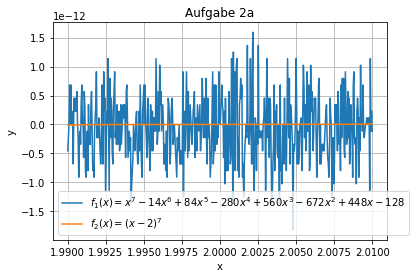

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

x = np.linspace(1.99, 2.01, 501)
y1 = (x**7 - 14*x**6 +84*x**5-280*x**4 + 560*x**3 - 672*x**2 + 448*x - 128)
y2 = (x-2)**7

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.grid()
plt.title('Aufgabe 2a')
plt.legend(["$f_{1}(x) = x^{7}-14x^{6}+84x^{5}-280x^{4}+560x^{3}-672x^{2}+448x-128$", 
            "$f_{2}(x) = (x-2)^{7}$"])
plt.xlabel('x')
plt.ylabel('y')

plt.show()

- Plotten Sie die Funktion auf dem Intervall $x ∈ [−10−14,10−14]$ mit einer Schrittweite von $10^{−17}$. Ist die numerische Berechnung des Grenzwertes $lim_{x→0}g(x)$ auf diese Weise stabil?

    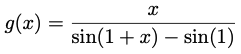
    
#### Lösung:


<ipython-input-2-a7a3dd437eec>:10: RuntimeWarning: divide by zero encountered in true_divide
  return x/(np.sin(1+x) - np.sin(1))


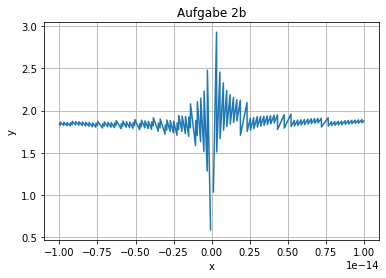

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# weil np.linspace() keinen float als step akzeptiert, muss die Schrittweite so berechnet werden
steps = round((10**-14 - -10**-14)/10**-17)
x = np.linspace(-10**-14, 10**-14, steps)

def g(x):
    return x/(np.sin(1+x) - np.sin(1))

plt.figure()
plt.plot(x, g(x))

plt.grid()
plt.title('Aufgabe 2b')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Aufgabe 4
- Überlegen Sie sich einen kurzen iterativen Algorithmus, der die Maschinengenauigkeit eps Ihres Rechners berechnet. Schliessen Sie aus dem Ergebnis, ob Ihr Rechner im Dual- oder Dezimalsystem rechnet und mit welcher Stellenzahl er operiert.

#### Lösung:
- Mit vortlaufender Halbierung von $eps$ während $eps + 1 \neq eps$ noch erfüllt ist, erhält man $eps = 2.2204e − 16$ (Achtung: diese Notation is gleichbedeutend wie $2.2204 · 10^{−16}$), welches $2^{−52}$ entspricht. Damit ist die Basis $B = 2$ und die Anzahl Mantisse-Stellen 52.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import sys

def machineEpsilon(func=float):
    machine_epsilon = func(1)
    while func(1)+func(machine_epsilon) != func(1):
        machine_epsilon_last = machine_epsilon
        machine_epsilon = func(machine_epsilon) / func(2)
    return machine_epsilon_last

machineEpsilon(float)

2.220446049250313e-16

## Übungsserie 3
### Aufgabe 1
- Betrachten Sie einen Rechner, der im Dezimalsystem arbeitet mit einer zehnstelligen Gleitpunktarithmetik (also $n$ = 10 für die Mantisse) und einem beliebig grossen Exponenten. Erklären Sie anhand einer kurzen konkreten Berechnung, weshalb für eine positve Zahl $x \neq 0$, die kleiner als die Maschinengenauigkeit $eps$ ist, der Rechner $1 + x$ nicht mehr korrekt berechnen kann (bekanntlich wird er $1 + x = 1$ ausgeben), wohingegen er keine Probleme hat, z.B. $√x$ oder $x/10^{9}$ richtig zu berechnen.

Tipp: Berechnen Sie $eps$, nehmen Sie für $x$ eine konkrete Zahl $< eps$ an, berechnen Sie die obigen Grössen und normieren Sie sie wie in Kap. 2 des Skriptes.

### Lösung:
- Maschinengenauigkeit: $eps = 5*10^{-10} = 0.5*10^{-9}$
- Sei z.B. $x = 0.4*10^{-9} < eps$. Dann ist bei Rundung auf $n = 10$
    
    $1+x=1+0.4*10^{-9}=1+0.0000000004=1.0000000004=0.1000000000|4*10^{1}=1$
- aber

    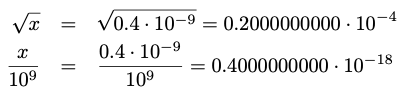
    
### Aufgabe 2
- Ist das Potenzieren $(f(x) = x^{n} , n ∈ N)$ bzw. das Wurzelziehen $(f(x) = x^{\frac{1}{n}} ,n ∈ N)$ einer rellen Zahl x gut oder schlecht konditioniert?

### Lösung:
- Konditionszahl fürs Potenzieren:
    - $n=2$
    - $f(x)=x^{2}$
    - $f'(x)=2x^{2-1}=2x$
    - $K=\frac{|f'(x)|*|x|}{|f(x)|}=\frac{|2x|*|x|}{|x^{2}|}=\frac{2x}{x}=2=n$
- Konditionszahl fürs Wurzelziehen:
    - $K=\frac{1}{n}$
    
### Aufgabe 3
$y=\log_{a}{f(x)}=\log_{a}{c*a^x}=\log_{a}{c}+\log_{a}{a^x}=c1+x*\log_{a}{a}=x+c1$

$y=\log_{a}{f(x)}=\log_{a}{c*x^a}=\log_{a}{c}+\log_{a}{x^a}=c1+a*\log_{a}{x}$

- Beweisen Sie diese beiden Aussagen zuerst für sich selbst analytisch (Tipp: berechnen Sie $y = log f (x) = ...$). Geben Sie dann den y-Achsenabschnitt und Steigung der untenstehenden Funktionen in dem Koordinatensystem an, in dem der Funktionsgraph eine Gerade ist.

 - $f(x) = \frac{5}{\sqrt[3]{2x^{2}}}$
 - $g(x) = 10^{5}*(2e)^{-x/100}$
 - $h(x) = (\frac{10^{2x}}{2^{5x}})^2$
 
### Lösung:
- $f(x) = \frac{5}{\sqrt[3]{2x^{2}}} = 5*2^{-\frac{1}{3}}x^{-\frac{2}{3}}$: Achsenabschnitt $log(5*2^{-\frac{1}{3}})$, Steigung $-\frac{2}{3}$
- $g(x) = 10^{5}*(2e)^{-x/100} = 10^{5}*((2e)^{-\frac{1}{100}})^{x}$: Achsenabschnitt $log10^{5}$ und Steigung $log(2e)^{-\frac{1}{100}}$
- $h(x) = (\frac{10^{2x}}{2^{5x}})^2 = \frac{10^{4x}}{2^{10x}} = (\frac{10^{4}}{2^{10}})^{x}$: Achsenabschnitt 0 und Steigung $log\frac{10^{4}}{2^{10}}$

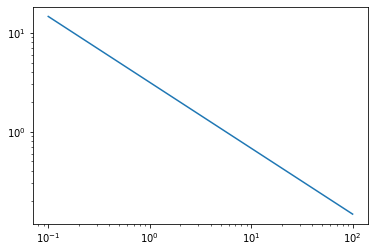

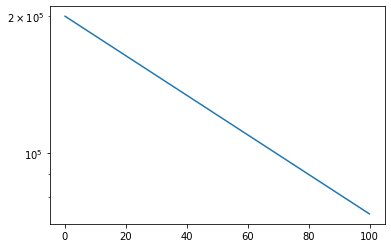

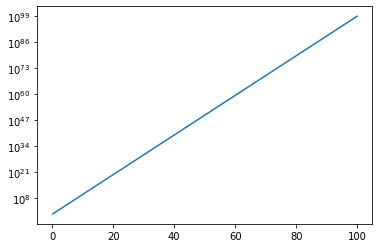

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(0.1,100,0.02)

ya33 = 5/(((2*x1)**2)**(1/3))
plt.loglog(x1, ya33)
plt.show()

ya34 = 10**5*(2*np.exp((-1)*x1/100))
plt.semilogy(x1, ya34)
plt.show()

ya35 = (10**(2*x1)/2**(5*x1))**2
plt.semilogy(x1, ya35)
plt.show()

### Aufgabe 4
- Gegeben sit die Funktion: $h(x) = \sqrt{100x^{2}-200x+99}$, für $x\geq1.1$

    - Für $x$ in der Nähe von 1.1 entsteht bei der numerischen Auswertung von h(x) Auslöschung. Erklären Sie stichwortartig und mit entsprechenden Berechnungen oder einem Plot, warum das so ist.
    - Erstellen Sie für $x ∈ [1.1, 1.3]$ mit einer Auflösung von $∆x = 10^{−7}$ einen halblogarithmischen Plot der Kondition von $h(x)$.
    
### Lösung:

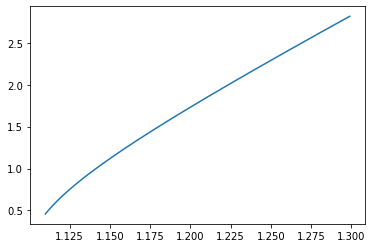

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1.110, 1.300, 0.001)

def h(x):
    return (100*x**2-200*x+99)**(1/2)

plt.plot(x, h(x))
plt.show()

<ipython-input-13-62ba8df65d41>:7: RuntimeWarning: invalid value encountered in sqrt
  return abs((100*x-100)/(100*x**2-200*x+99)**(1/2))*x/abs((100*x**2-200*x+99)**(1/2))


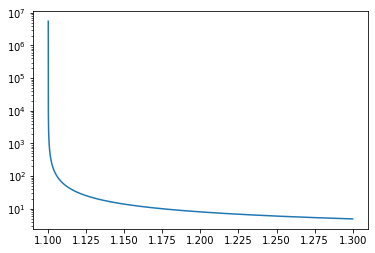

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1.1,1.3,0.0000001)

def kondition(x):
    return abs((100*x-100)/(100*x**2-200*x+99)**(1/2))*x/abs((100*x**2-200*x+99)**(1/2))

plt.semilogy(x, kondition(x))
plt.show()

# Numerische Lösung von Nullstellenproblemen

Lernziele:
- Sie können die Begriffe Fixpunktgleichung, Fixpunktiteration sowie anziehender bzw. abstossender Fix- punkt definieren.
- Sie können zu einer konkreten Aufgabenstellung die Fixpunktgleichung aufstellen und die entsprechende Iteration durchführen.
- Sie können dabei auftretende Fehler mittels des Banachschen Fixpunktsatzes quantifizieren.
- Sie können das Newtonverfahren, das vereinfachte Newtonverfahren sowie das Sekantenverfahren anwenden.
- Sie verstehen der Begriff der Konvergenzordnung.



In [57]:
import numpy as np
import matplotlib.pyplot as plt

def FixPunktIteration(x, approx):
    for i in x:
        x = [i]
        counter = 0
        while True:
            x.append(x[counter]**3+0.3)
            counter += 1
            if x[counter] - x[counter-1] <= approx:
                print("x-Startpoint: ",str(i))
                print(x[counter-1])
                print(x[counter])
                break
    
x = np.arange(-1,1, 0.1)
FixPunktIteration(x, 10**-7)

x-Startpoint:  -1.0
0.3389361492499188
0.3389362097698153
x-Startpoint:  -0.9
0.33893617182222124
0.3389362175489793
x-Startpoint:  -0.8
0.33893613138052003
0.3389362036114286
x-Startpoint:  -0.7000000000000001
0.3389361492499188
0.3389362097698153
x-Startpoint:  -0.6000000000000001
0.3389361505808347
0.3389362102284931
x-Startpoint:  -0.5000000000000001
0.3389361602552471
0.3389362135626163
x-Startpoint:  -0.40000000000000013
0.3389361769823406
0.3389362193273277
x-Startpoint:  -0.30000000000000016
0.3389361021598465
0.3389361935410181
x-Startpoint:  -0.20000000000000018
0.3389361341669917
0.338936204571739
x-Startpoint:  -0.1000000000000002
0.33893614744058254
0.3389362091462581
x-Startpoint:  -2.220446049250313e-16
0.3389361494069113
0.33893620982392014
x-Startpoint:  0.09999999999999964
0.3389361513912107
0.3389362105077755
x-Startpoint:  0.19999999999999973
0.3389361657974733
0.3389362154726513
x-Startpoint:  0.2999999999999998
0.3389361494069113
0.33893620982392014
x-Startpoint: 

<ipython-input-57-02fa29387a98>:9: RuntimeWarning: overflow encountered in double_scalars
  x.append(x[counter]**3+0.3)
<ipython-input-57-02fa29387a98>:11: RuntimeWarning: invalid value encountered in double_scalars
  if x[counter] - x[counter-1] <= approx:


KeyboardInterrupt: 

## Fixpunktiteration

## Newton Verfahren

### Vereinfachtes Newton Verfahren

### Sekantenverfahren

## Konvergenzgeschwindigkeit

## Fehlerabschätzung

# Numerische Lösung linearer Gleichungssysteme

## Gaussalgorithmus

## Fehlerfortpflanzung beim Gauss-Algorithmus und Pivotisierung

## Dreieckszerlegung von Matrizen

# Utils

#### Konvertiere ein Float zu einer binären Zahl

In [10]:
def float_bin(number, places = 3): 
  
    # split() seperates whole number and decimal  
    # part and stores it in two seperate variables 
    whole, dec = str(number).split(".") 
  
    # Convert both whole number and decimal   
    # part from string type to integer type 
    whole = int(whole) 
    dec = int (dec) 
  
    # Convert the whole number part to it's 
    # respective binary form and remove the 
    # "0b" from it. 
    res = bin(whole).lstrip("0b") + "."
  
    # Iterate the number of times, we want 
    # the number of decimal places to be 
    for x in range(places): 
  
        # Multiply the decimal value by 2  
        # and seperate the whole number part 
        # and decimal part 
        whole, dec = str((decimal_converter(dec)) * 2).split(".") 
  
        # Convert the decimal part 
        # to integer again 
        dec = int(dec) 
  
        # Keep adding the integer parts  
        # receive to the result variable 
        res += whole 
  
    return res 
  
# Function converts the value passed as 
# parameter to it's decimal representation 
def decimal_converter(num):  
    while num > 1: 
        num /= 10
    return num 

print(float_bin(3/5, places = 5))

.10011


#### Berechne eine Funktion und stelle es in matplotLib dar
- - $f(x) = x^{5}-5x^{4}-30x^{3}+110x^{2}+29x-105$ für $x \in [-10,10]$. Schränken Sie die x−Achse und y−Achse mit den Befehlen plt.xlim() und plt.ylim() so ein, dass Sie alle 5 Nullstellen des Polynoms vom Grafikfenster von Auge ablesen können. Blenden Sie dazu ein Gitternetz ein mit dem Befehl plt.grid().

- Geben Sie jetzt zusätzlich noch die Ableitungsfunktion $f′(x)$ und die Stammfunktion $F(x)$ von $f(x)$ an und plotten Sie diese in die gleiche Grafik. Die Integrationskonstante soll 0 sein.

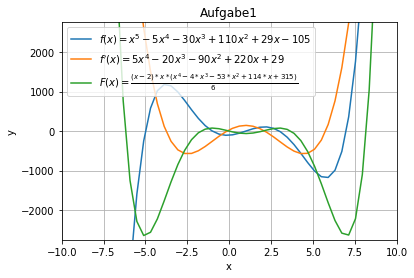

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# linspace besser damit es nicht so kantige wellen hat
x = np.linspace(-10,10)

def f(x):
    return x**5-5*x**4-30*x**3+110*x**2+29*x-105

def fAbgeleitet(x):
    return (5*x**4 - 20*x**3 -90*x**2 + 220*x + 29)

def fAufgeleitet(x):
    return ((x-2)*x*(x**4-4*x**3-53*x**2+114*x+315))/6

plt.figure()
plt.plot(x, f(x))
plt.plot(x, fAbgeleitet(x))
plt.plot(x, fAufgeleitet(x))

plt.xlim(-10,10)
plt.ylim(-2750,2750)

plt.grid()
plt.title('Aufgabe1')
plt.legend(["$f(x) = x^{5}-5x^{4}-30x^{3}+110x^{2}+29x-105$", 
            "$f'(x)=5x^{4} - 20x^{3} -90x^{2} + 220x + 29$", 
            "$F(x)=\\frac{(x-2)*x*(x^{4}-4*x^{3}-53*x^{2}+114*x+315)}{6}$"])
plt.xlabel('x')
plt.ylabel('y')

plt.show()

#### Berechne die Polynomfunktionen mit einer generellen Funktion welche ableitet und aufleitet
- Verallgemeinern Sie nun für ein beliebiges Polynom und schreiben Sie eine Funktion Gruppe_S1_Aufg2.py, welche Ihnen
 - die Funktionswerte für das beliebige Polynom $p(x) = a_{n}x^{n} + a_{n}−1x^{n−1} + ... + a_{1}x + a_{0}$ vom Grad $n ≥ 0$ für ein vorgegebenes $x$- Intervall berechnet sowie
 - die Ableitungsfunktion $p′(x)$ als auch die Stammfunktion $P(x)$ gemäss den bekannten Ableitungs- bzw. Integralregeln für Polynome berechnet. Die Integrationskonstante soll dabei 0 sein.

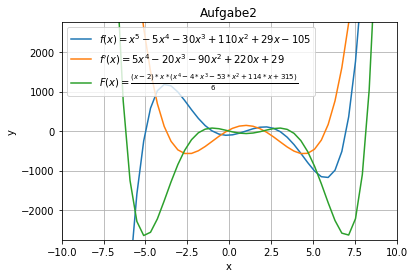

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

def polynomfunc(a, xmin, xmax):
    shapes = np.shape(a)
    x = np.linspace(xmin, xmax)
    p = 0
    dp = 0
    pint = 0
    column = len(shapes) - 1
 
    if shapes[0] <= 0 or (column > 1 and shapes[column] > 1):
        raise Exception('Fehler')
    for index, item in enumerate(a):
        if type(item) is int or float:
            shape = shapes[0] - 1
            p += (item*(x**(shape - index)))
            dp += ((item*(shape - index)*(x**((shape-index)-1))))
            pint += ((item / ((shape-index)+1))*(x**((shape-index)+1)))
        else:
            shape = shapes[0] - 1
            p += (item[0]*(x**(shape - index)))
            dp += ((item[0]*(shape - index)*(x**((shape-index)-1))))
            pint += ((item[0] / ((shape-index)+1))*(x**((shape-index)+1)))
    return (x, p, dp, pint)

a =  np.array([1,-5,-30,110,29,-105])
xmin = -10
xmax = 10

[x,p,dp,pint] = polynomfunc(a,xmin,xmax)

plt.figure()
plt.plot(x,p)
plt.plot(x,dp)
plt.plot(x,pint)

plt.xlim(xmin, xmax)
plt.ylim(-2750,2750)

plt.grid()
plt.title('Aufgabe2')
plt.legend(["$f(x) = x^{5}-5x^{4}-30x^{3}+110x^{2}+29x-105$", 
            "$f'(x)=5x^{4} - 20x^{3} -90x^{2} + 220x + 29$", 
            "$F(x)=\\frac{(x-2)*x*(x^{4}-4*x^{3}-53*x^{2}+114*x+315)}{6}$"])
plt.xlabel('x')
plt.ylabel('y')

plt.show()